# Projet de test A/B


## Visualizacon de los datos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import math
from statsmodels.stats.proportion import proportions_ztest


In [2]:
ab_project = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
final_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
final_events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
final_partisipants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

In [3]:
ab_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
ab_project.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [5]:
final_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
final_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [7]:
final_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [8]:
final_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [9]:
final_partisipants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [10]:
final_partisipants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


## Data correcion.

I changed the column type so that we can work properly with the column of dates.

In [11]:

ab_project["start_dt"] = pd.to_datetime(ab_project["start_dt"])
ab_project["finish_dt"] = pd.to_datetime(ab_project["finish_dt"])


In [12]:
final_users["first_date"] = pd.to_datetime(final_users["first_date"])

In [13]:
final_events["event_dt"] = pd.to_datetime(final_events["event_dt"])

Duplicate and Null values

In [14]:
a = ab_project.duplicated().sum()
b = ab_project.isna().sum()
print(f"There are {a} duplicated cases" )
print(b)

There are 0 duplicated cases
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


In [15]:
c = final_users.duplicated().sum()
d = final_users.isnull().sum()
print(f"There are {c} duplicated cases" )
print(d)


There are 0 duplicated cases
user_id       0
first_date    0
region        0
device        0
dtype: int64


In [16]:
e = final_events.duplicated().sum()
f = final_events.isnull().sum()
print(f"There are {e} duplicated cases" )
print(d)


There are 0 duplicated cases
user_id       0
first_date    0
region        0
device        0
dtype: int64


In [17]:
g = final_partisipants.duplicated().sum()
h = final_partisipants.isnull().sum()
print(f"There are {g} duplicated cases")
print(h)

There are 0 duplicated cases
user_id    0
group      0
ab_test    0
dtype: int64


No update was made in this case. 

## Exploratory Data Analysis

In [18]:
events_merge = final_events.merge(final_partisipants[["user_id", "group"]], on="user_id", how='left')

In [19]:
events_merge.head(5)

,user_id,event_dt,event_name,details,group
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN


In [20]:
funnel_events = events_merge[events_merge["event_name"].isin(["product_page", "product_cart", "purchase"])]
funnel_events.head()

,user_id,event_dt,event_name,details,group
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN


In [21]:
funnel_users = funnel_events.groupby(["group", "event_name"])["user_id"].nunique().reset_index()
funnel_users

,group,event_name,user_id
0,A,product_cart,2483
1,A,product_page,5208
2,A,purchase,2682
3,B,product_cart,2037
4,B,product_page,3986
5,B,purchase,2008


In [22]:
funnel_pivot = funnel_users.pivot(index="group", columns="event_name", values="user_id")
funnel_pivot

event_name,product_cart,product_page,purchase
group,,,
A,2483,5208,2682
B,2037,3986,2008


In [23]:
funnel_pivot = funnel_pivot[["product_page", "product_cart", "purchase"]]
funnel_pivot = funnel_pivot[['product_page','product_cart','purchase']].copy() # I was forced to use .copy to continu with the funnel since it gave me an error one I changed the order of the columns
funnel_pivot

event_name,product_page,product_cart,purchase
group,,,
A,5208,2483,2682
B,3986,2037,2008


In [24]:
funnel_pivot['conv_page_to_cart'] = (funnel_pivot["product_cart"] / funnel_pivot["product_page"] * 100).round(2)
funnel_pivot['conv_cart_to_purchase'] = (funnel_pivot['purchase'] / funnel_pivot['product_cart'] * 100).round(2)

funnel_pivot

event_name,product_page,product_cart,purchase,conv_page_to_cart,conv_cart_to_purchase
group,,,,,
A,5208,2483,2682,47.68,108.01
B,3986,2037,2008,51.10,98.58


Group A had significantly more visitors, but only half, or even less, reached the shopping cart. This shows that, despite the increased traffic, few people progressed further in the process.

In contrast, Group B had fewer visitors, but more than half of them reached the shopping cart. In other words, although it had less traffic, it was more effective at guiding users toward completing their purchase.

Therefore, it can be concluded that the new funnel (B) is better, as it improves the page-to-cart transition, demonstrating greater efficiency in converting visitors into potential buyers.

An inconsistency is observed in the funnel, as the number of purchases exceeds the number of cart events, which indicates possible failures in the tracking system or alternative purchase routes that do not correctly register the product_cart event.

¿El número de eventos por usuario está distribuido equitativamente entre las muestras?


In [25]:
events_per_user = final_events.groupby('user_id').size().reset_index(name='events_count')
events_per_user

,user_id,events_count
0,0001710F4DDB1D1B,6
1,000199F1887AE5E6,16
2,0002499E372175C7,9
3,0002CE61FF2C4011,12
4,000456437D0EFFE1,4
...,...,...
58698,FFF7A7BAF44FE9B4,2
58699,FFF8FDBE2FE99C91,12
58700,FFF91B6C5431F375,8
58701,FFFAB034A09DCC28,4


In [26]:

events_with_group = events_per_user.merge(final_partisipants[['user_id','group']], on='user_id', how='left')
events_with_group = events_with_group.dropna(subset=['group'])
events_with_group


,user_id,events_count,group
3,0002CE61FF2C4011,12,A
14,001064FEAAB631A1,6,B
15,001064FEAAB631A1,6,B
16,0010A1C096941592,12,A
32,001E72F50D1C48FA,6,B
...,...,...,...
59565,FFE7FC140521F5F6,16,B
59573,FFEFC0E55C1CCD4F,4,B
59577,FFF28D02B1EACBE1,9,B
59578,FFF28D02B1EACBE1,9,A


In [27]:
events_with_group.groupby('group')['events_count'].mean()

group
A    7.146944
B    6.993028
Name: events_count, dtype: float64

In [28]:
events_with_group.groupby('group')['events_count'].agg(['mean','median','std'])


,mean,median,std
group,,,
A,7.146944,6,4.041994
B,6.993028,6,4.079862


I consider the events are equal distributed  

¿Hay usuarios que están presentes en ambas muestras?


In [29]:
users_in_both = final_partisipants.groupby('user_id')['group'].nunique()

users_in_both = users_in_both[users_in_both > 1] # Muéstrame solo los usuarios que aparecen en MÁS DE UN grupo

users_in_both

user_id
0082295A41A867B5    2
00E68F103C66C1F7    2
02313B9E82255F47    2
04F2CF340B4F3822    2
051D59BC38C3B3AA    2
                   ..
FE2AF0E94DBD470E    2
FE8F9858BBE502D9    2
FEA0C585A53E7027    2
FEC0BCA6C323872F    2
FFF28D02B1EACBE1    2
Name: group, Length: 441, dtype: int64

In [30]:

bad_users = users_in_both.index
participants_clean = final_partisipants[~final_partisipants['user_id'].isin(bad_users)]
events_part_clean = final_events.merge(
    participants_clean[['user_id','group']],
    on='user_id',
    how='left'
)
participants_clean.groupby('user_id')['group'].nunique().max()



1

A significant problem was detected in the data: 441 users appear in both groups A and B. This indicates sample contamination, as the same user should not be part of two versions of the experiment. This issue may affect the validity of the A/B test results and must be corrected before proceeding with the statistical analysis.

¿Cómo se distribuye el número de eventos entre los días?


In [31]:
final_events["event_Date"] = events_part_clean["event_dt"].dt.date
final_events.head()

,user_id,event_dt,event_name,details,event_Date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07


In [32]:
events = final_events.merge(final_partisipants[["user_id", "group"]], on="user_id", how="left")
events.head()

,user_id,event_dt,event_name,details,event_Date,group
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,B
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,NaN


In [33]:
events_per_day_group = events.groupby(['event_Date', 'group']).size().reset_index(name='num_events')
events_per_day_group.head()

,event_Date,group,num_events
0,2020-12-07,A,1366
1,2020-12-07,B,1401
2,2020-12-08,A,1525
3,2020-12-08,B,1460
4,2020-12-09,A,1528


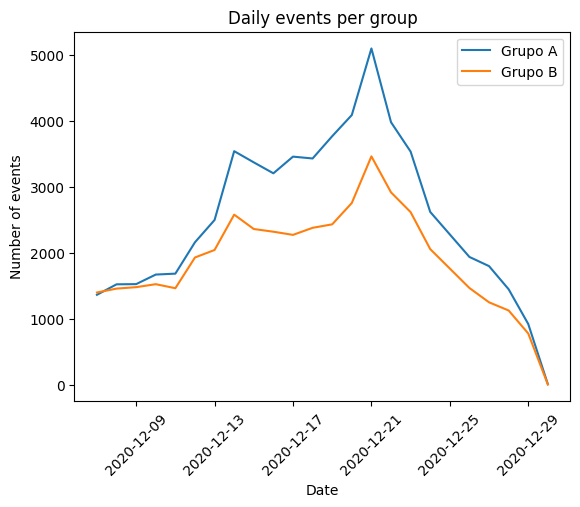

In [34]:
for g in ['A','B']:
    subset = events_per_day_group[events_per_day_group['group'] == g]
    plt.plot(subset['event_Date'], subset['num_events'], label=f'Grupo {g}')

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of events")
plt.title("Daily events per group")
plt.legend()
plt.show()

¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?



-Before analyzing the A/B test results, the data was reviewed, and some peculiarities were detected:

-Users appearing in both groups were removed to ensure each participant was in only one group.

-The distribution of users by date and group was verified, as users registered at the end of the period have less time to generate events.

-Some users were observed with an atypical number of events, which could skew the average metrics.

-Null values and the consistency of group assignments were reviewed.

## Evaluar los resultados de la prueba A/B:


¿Qué puedes decir sobre los resultados de la prueba A/B?


In [35]:
participants_clean = participants_clean.merge(final_users[["user_id", "first_date"]], on="user_id", how="left")
participants_clean

,user_id,group,ab_test,first_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08
3,04988C5DF189632E,A,recommender_system_test,2020-12-14
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20
...,...,...,...,...
13638,1D302F8688B91781,B,interface_eu_test,2020-12-15
13639,3DE51B726983B657,A,interface_eu_test,2020-12-07
13640,F501F79D332BE86C,A,interface_eu_test,2020-12-17
13641,63FBE257B05F2245,A,interface_eu_test,2020-12-20


In [36]:
events_full = final_events.merge(participants_clean[['user_id', 'group', 'first_date']], on="user_id", how="inner" )
events_full.head()

,user_id,event_dt,event_name,details,event_Date,group,first_date
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,B,2020-12-07
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-07,B,2020-12-07
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-08,B,2020-12-07
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,2020-12-24,B,2020-12-07
4,96F27A054B191457,2020-12-07 04:02:41,product_page,NaN,2020-12-29,B,2020-12-07


In [37]:
users_per_group = participants_clean.groupby("group")["user_id"].nunique()
users_per_group

group
A    7433
B    5764
Name: user_id, dtype: int64

In [38]:
buyers = events_full[events_full["event_name"] == "purchase"] \
            .groupby("group")["user_id"] \
            .nunique()

buyers

group
A    2555
B    1881
Name: user_id, dtype: int64

In [39]:
conversion = buyers / users_per_group * 100
conversion

# 1.740151 puntos porcentuales, esa diferencia es real o es pura suerte

group
A    34.373739
B    32.633588
Name: user_id, dtype: float64

In [40]:


count = [buyers['A'], buyers['B']]
nobs = [users_per_group['A'], users_per_group['B']]

stat, p_value = proportions_ztest(count, nobs)

alpha = 0.05

print("Z-stat:", stat)
print("P-value:", p_value)

if p_value < alpha:
    print("✅ Statistically significant difference: H0 is rejected") # se rechaza la hipotesis nula/ Se acepta la alternativa
else:
    print("❌ There is no statistically significant difference: H0 is not rejected") # Se acepta la hipotesis nula/ Se rechaza la Alternativa

# stat = La diferencia entre A y B es suficientemente grande
# p_value = Es poco probable que esa diferencia sea por azar
# H0 = “Todo es igual, hasta que se demuestre lo contrario”

#0.035, osea 3.5%, osea 3.5 de cada 100 veces se veria algo por azar, 



Z-stat: 2.098920425931528
P-value: 0.03582391593808816
✅ Statistically significant difference: H0 is rejected


Although group A showed a higher conversion rate than group B (34.37% vs. 32.63%), the z-test yielded a p-value of 0.035, indicating that the probability of observing this difference by chance, assuming no real difference exists between the groups, is 3.5%. Since this value is less than the 5% significance level, the null hypothesis is rejected, and it is concluded that the difference is statistically significant.